In [99]:
import os
import spacy
from spacy import displacy
import cv2
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd="/home/aman/anaconda3/envs/tallyInvoiceParser.env/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = "/home/aman/anaconda3/envs/tallyInvoiceParser.env/share/tessdata"
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
os.chdir('/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Data/Images')

In [101]:
imageFolderPath = '/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Data/Images'
imagePath = "28.jpeg"

In [102]:
image = cv2.imread(imagePath)

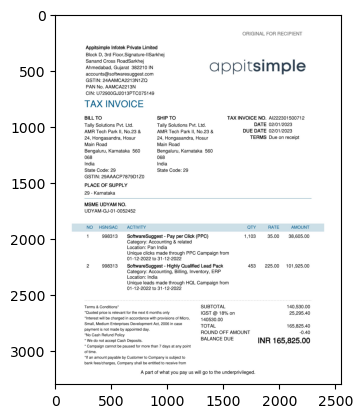

In [103]:
plt.imshow(image)

In [104]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

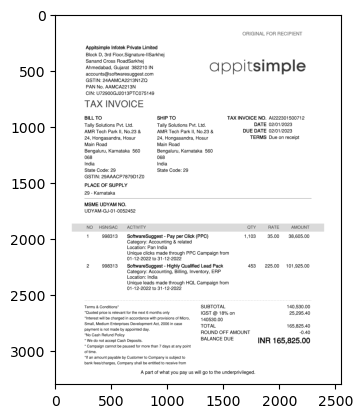

In [105]:
plt.imshow(image, cmap="gray")

In [106]:
image = cv2.adaptiveThreshold(image,255,1,1,11,2)

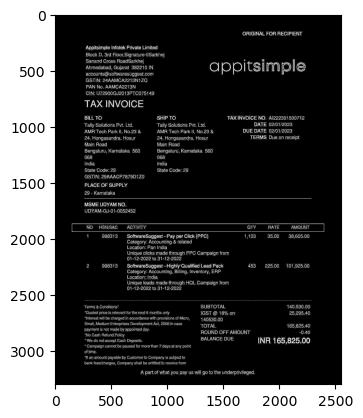

In [107]:
plt.imshow(image, cmap="gray")

In [108]:
data = pytesseract.image_to_data(image, output_type=Output.DATAFRAME)

In [109]:
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,2550,3300,-1.000000,NaN
1,2,1,1,0,0,0,1664,152,540,40,-1.000000,NaN
2,3,1,1,1,0,0,1664,152,540,40,-1.000000,NaN
3,4,1,1,1,1,0,1664,152,540,40,-1.000000,NaN
4,5,1,1,1,1,1,1664,152,206,40,90.361061,‘ORIGINAL
...,...,...,...,...,...,...,...,...,...,...,...,...
321,5,1,19,1,1,6,1193,3184,38,32,35.437836,us
322,5,1,19,1,1,7,1238,3176,64,40,35.437836,will
323,5,1,19,1,1,8,1312,3176,96,48,0.000000,go-to
324,5,1,19,1,1,9,1416,3176,64,40,96.266869,the


In [110]:
data.dropna(inplace=True)
indexesToDrop = []
stopwords = ["", " ", "  ", "/", ":", "-", ".", ",", "\n", "\t", "\\", "(", ")", "[", "]", "{", "}", "*", "&", "%", "$", "#", "|"]
for index in data.index:
    if data["text"][index] in stopwords:
        indexesToDrop.append(index)   
data.drop(indexesToDrop, inplace=True)
data.reset_index(inplace=True)
data.drop(columns=["index"], inplace=True)
for index in data.index:
    data["text"][index] = str(data["text"][index])

/tmp/ipykernel_24651/3176424829.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["text"][index] = str(data["text"][index])


In [111]:
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,1664,152,206,40,90.361061,‘ORIGINAL
1,5,1,1,1,1,2,1880,152,95,40,88.297424,FOR
2,5,1,1,1,1,3,1985,152,219,40,88.297424,RECIPIENT
3,5,1,2,1,1,1,272,280,352,43,9.978416,Appitsimple:Infotek
4,5,1,2,1,1,2,640,282,127,38,96.841125,Private
...,...,...,...,...,...,...,...,...,...,...,...,...
213,5,1,19,1,1,6,1193,3184,38,32,35.437836,us
214,5,1,19,1,1,7,1238,3176,64,40,35.437836,will
215,5,1,19,1,1,8,1312,3176,96,48,0.000000,go-to
216,5,1,19,1,1,9,1416,3176,64,40,96.266869,the


In [112]:
data["x"] = data["left"] + data["width"]/2
data["y"] = data["top"] + data["height"]/2

data["x"]/=image.shape[1]
data["y"]/=image.shape[0]

In [113]:
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y
0,5,1,1,1,1,1,1664,152,206,40,90.361061,‘ORIGINAL,0.692941,0.052121
1,5,1,1,1,1,2,1880,152,95,40,88.297424,FOR,0.755882,0.052121
2,5,1,1,1,1,3,1985,152,219,40,88.297424,RECIPIENT,0.821373,0.052121
3,5,1,2,1,1,1,272,280,352,43,9.978416,Appitsimple:Infotek,0.175686,0.091364
4,5,1,2,1,1,2,640,282,127,38,96.841125,Private,0.275882,0.091212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,5,1,19,1,1,6,1193,3184,38,32,35.437836,us,0.475294,0.969697
214,5,1,19,1,1,7,1238,3176,64,40,35.437836,will,0.498039,0.968485
215,5,1,19,1,1,8,1312,3176,96,48,0.000000,go-to,0.533333,0.969697
216,5,1,19,1,1,9,1416,3176,64,40,96.266869,the,0.567843,0.968485


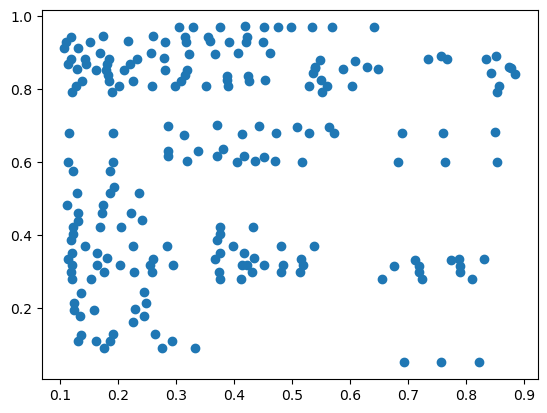

In [114]:
plt.scatter(data["x"], data["y"])
plt.show()

In [115]:
from sklearn.cluster import DBSCAN
import seaborn as sns

In [116]:
XTrain = data[["x", "y"]]

In [117]:
XTrain

,x,y
0,0.692941,0.052121
1,0.755882,0.052121
2,0.821373,0.052121
3,0.175686,0.091364
4,0.275882,0.091212
...,...,...
213,0.475294,0.969697
214,0.498039,0.968485
215,0.533333,0.969697
216,0.567843,0.968485


In [118]:
ratio = 0.05 * (image.shape[0]/image.shape[1])
clustering = DBSCAN(eps=ratio, min_samples=1).fit(XTrain)

In [119]:
DBSCAN_dataset = data.copy()

In [120]:
data.loc[:, "Cluster"] = clustering.labels_

In [121]:
data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y,Cluster
0,5,1,1,1,1,1,1664,152,206,40,90.361061,‘ORIGINAL,0.692941,0.052121,0
1,5,1,1,1,1,2,1880,152,95,40,88.297424,FOR,0.755882,0.052121,0
2,5,1,1,1,1,3,1985,152,219,40,88.297424,RECIPIENT,0.821373,0.052121,1
3,5,1,2,1,1,1,272,280,352,43,9.978416,Appitsimple:Infotek,0.175686,0.091364,2
4,5,1,2,1,1,2,640,282,127,38,96.841125,Private,0.275882,0.091212,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,5,1,19,1,1,6,1193,3184,38,32,35.437836,us,0.475294,0.969697,14
214,5,1,19,1,1,7,1238,3176,64,40,35.437836,will,0.498039,0.968485,14
215,5,1,19,1,1,8,1312,3176,96,48,0.000000,go-to,0.533333,0.969697,14
216,5,1,19,1,1,9,1416,3176,64,40,96.266869,the,0.567843,0.968485,14


In [122]:
data.Cluster.value_counts().to_frame()

,Cluster
14,66
2,59
3,23
5,22
15,13
4,12
16,8
17,3
0,2
12,1


In [123]:
X = data["x"].to_numpy()
Y = data["y"].to_numpy()
clusters = data["Cluster"].to_numpy()

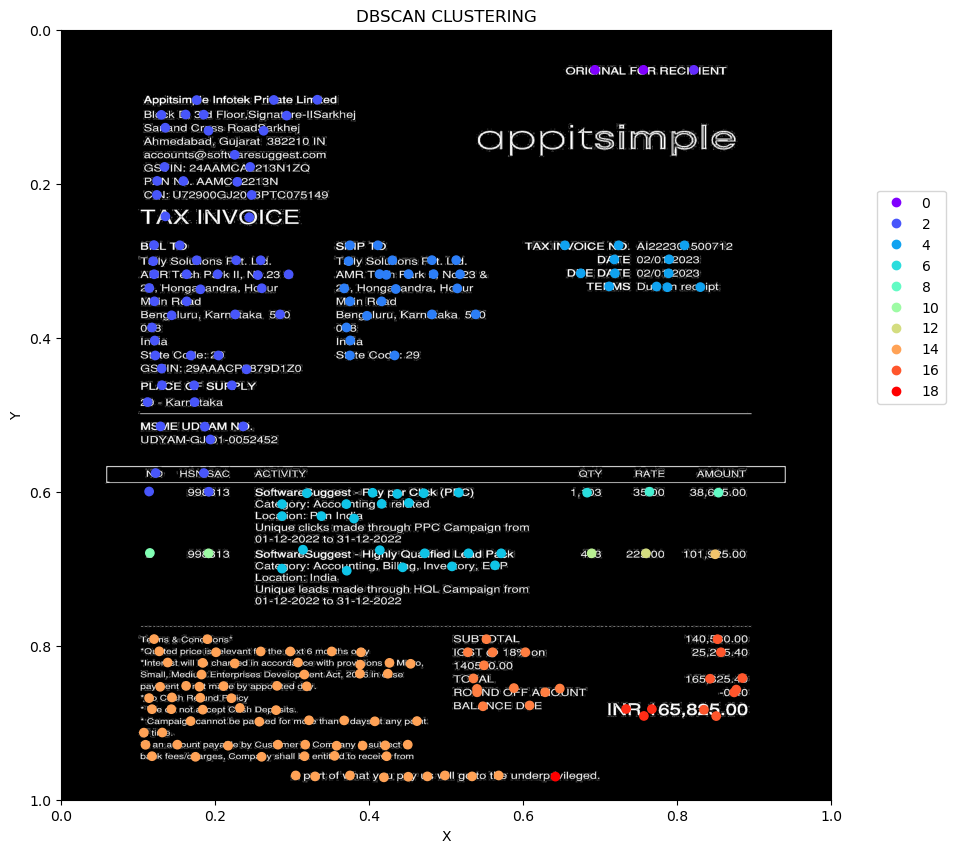

In [124]:
plt.figure(figsize=(12, 10))
plt.ylim(1, 0)
plt.xlim(0, 1)
plt.imshow(image, extent=[0, 1, 1, 0], cmap="gray")
scatter = plt.scatter(X, Y, c=clusters, cmap="rainbow")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("DBSCAN CLUSTERING")
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.show()

In [125]:
texts = {}
for cluster in clusters:
    df = data[data["Cluster"]==cluster]
    text = df["text"].to_numpy()
    T = " ".join(text)
    texts[cluster] = T

In [126]:
for key in texts.keys():
    print(key, " : ", texts[key])
    print("\n")

0  :  ‘ORIGINAL FOR


1  :  RECIPIENT


2  :  Appitsimple:Infotek Private Limited) Block D, 3rd, Floor,Signature-lISarkhej Sanand Cross RoadSarkhe| accounts@softwarésuggest.com GSTIN: 24AAMCA2213N1ZQ PAN No.. AAMCA2213N CIN: UZ2900GI2013PTC075149 TAX. INVOICE BILL TO: Tally Solutions Pvt. Ltd, JAMR' Tech: Park II,.No.23 '& 24, Hongasandra, Hosur Main Road Bengaluru; Karnataka, 560 068 india State ‘Code: 29. GSTIN: 29AAAGP7879D1Z0. PLACE OF SUPPLY 29 Karnataka MSME UDYAM NO.. UDYAM-GJ-01-0052452 NO HENSAG 1 998313


3  :  ‘SHIP TO: Tally Solutions Pvt. Ltd. /AMR: Tech Park II, No.23' 24, Hongasandra, Hosur Main Road Bengaluru; Karnataka, 560 068: India ‘State Code:.29


4  :  TAX'INVOICE NO. Al222301.500712 DATE 02/01/2023, DUE DATE 02/01/2023: TERMS Due on receipt:


5  :   SoftwareSuggest -:Pay per Click (PPC) Category: Accounting ;& related, Location: Pan India SoftwareSuggest ‘Highly ‘Qualified Lead! Pack Category: Accounting, Billing,. Inventory, ERP.


6  :  1,103


7  :  35:00




In [127]:
texts[1]

'RECIPIENT'

In [128]:
data["text"].to_numpy()

array(['‘ORIGINAL', 'FOR', 'RECIPIENT', 'Appitsimple:Infotek', 'Private',
       'Limited)', 'Block', 'D,', '3rd,', 'Floor,Signature-lISarkhej',
       'Sanand', 'Cross', 'RoadSarkhe|', 'accounts@softwarésuggest.com',
       'GSTIN:', '24AAMCA2213N1ZQ', 'PAN', 'No..', 'AAMCA2213N', 'CIN:',
       'UZ2900GI2013PTC075149', 'TAX.', 'INVOICE', 'BILL', 'TO:', '‘SHIP',
       'TO:', "TAX'INVOICE", 'NO.', 'Al222301.500712', 'Tally',
       'Solutions', 'Pvt.', 'Ltd,', 'Tally', 'Solutions', 'Pvt.', 'Ltd.',
       'DATE', '02/01/2023,', "JAMR'", 'Tech:', 'Park', 'II,.No.23', "'&",
       '/AMR:', 'Tech', 'Park', 'II,', "No.23'", 'DUE', 'DATE',
       '02/01/2023:', '24,', 'Hongasandra,', 'Hosur', '24,',
       'Hongasandra,', 'Hosur', 'TERMS', 'Due', 'on', 'receipt:', 'Main',
       'Road', 'Main', 'Road', 'Bengaluru;', 'Karnataka,', '560',
       'Bengaluru;', 'Karnataka,', '560', '068', '068:', 'india', 'India',
       'State', '‘Code:', '29.', '‘State', 'Code:.29', 'GSTIN:',
       '29AAAGP7

In [129]:
def batchCluster(imageFolderPath):
    os.chdir(imageFolderPath)
    dir = os.listdir(imageFolderPath)
    OUTPUT = {}
    for imagePath in dir:
        print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image = cv2.GaussianBlur(image, (3,3),1)
        image = cv2.adaptiveThreshold(image,255,1,1,11,2)

        data = pytesseract.image_to_data(image, output_type=Output.DATAFRAME)

        data.dropna(inplace=True)
        indexesToDrop = []
        stopwords = ["", " ", "  ", "/", ":", "-", ".", ",", "\n", "\t", "\\", "(", ")", "[", "]", "{", "}", "*", "&", "%", "$", "#", "|"]
        for index in data.index:
            if data["text"][index] in stopwords:
                indexesToDrop.append(index)   
        data.drop(indexesToDrop, inplace=True)
        data.reset_index(inplace=True)
        data.drop(columns=["index"], inplace=True)
        for index in data.index:
            data["text"][index] = str(data["text"][index])


        data["x"] = data["left"] + data["width"]/2
        data["y"] = data["top"] + data["height"]/2
        data["x"]/=image.shape[1]
        data["y"]/=image.shape[0]

        XTrain = data[["x", "y"]]

        if len(XTrain)==0:
            print("TESSERACT OCR FAILED !")
            
        else:
            ratio = 0.05 * (image.shape[0]/image.shape[1])
            clustering = DBSCAN(eps=ratio, min_samples=1).fit(XTrain)
    
            data.loc[:, "Cluster"] = clustering.labels_
            X = data["x"].to_numpy()
            Y = data["y"].to_numpy()
            clusters = data["Cluster"].to_numpy()
    
            plt.figure(figsize=(12, 10))
            plt.ylim(1, 0)
            plt.xlim(0, 1)
            plt.imshow(image, extent=[0, 1, 1, 0], cmap="gray")
            scatter = plt.scatter(X, Y, c=clusters, cmap="rainbow")
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.title("DBSCAN CLUSTERING")
            plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 0.8), loc='upper left')
            plt.show()
    
            texts = {}
            for cluster in clusters:
                df = data[data["Cluster"]==cluster]
                text = df["text"].to_numpy()
                T = " ".join(text)
                texts[cluster] = T
            OUTPUT[imagePath] = texts
    return OUTPUT
        
        

In [130]:
def listCluster(imageList):
    OUTPUT = {}
    for imagePath in imageList:
        print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image = cv2.GaussianBlur(image, (3,3),1)
        image = cv2.adaptiveThreshold(image,255,1,1,11,2)

        data = pytesseract.image_to_data(image, output_type=Output.DATAFRAME)

        data.dropna(inplace=True)
        indexesToDrop = []
        stopwords = ["", " ", "  ", "/", ":", "-", ".", ",", "\n", "\t", "\\", "(", ")", "[", "]", "{", "}", "*", "&", "%", "$", "#", "|"]
        for index in data.index:
            if data["text"][index] in stopwords:
                indexesToDrop.append(index)   
        data.drop(indexesToDrop, inplace=True)
        data.reset_index(inplace=True)
        data.drop(columns=["index"], inplace=True)
        for index in data.index:
            data["text"][index] = str(data["text"][index])


        data["x"] = data["left"] + data["width"]/2
        data["y"] = data["top"] + data["height"]/2
        data["x"]/=image.shape[1]
        data["y"]/=image.shape[0]

        XTrain = data[["x", "y"]]

        if len(XTrain)==0:
            print("TESSERACT OCR FAILED !")
            
        else:
            ratio = 0.05 * (image.shape[0]/image.shape[1])
            clustering = DBSCAN(eps=ratio, min_samples=1).fit(XTrain)
    
            data.loc[:, "Cluster"] = clustering.labels_
            X = data["x"].to_numpy()
            Y = data["y"].to_numpy()
            clusters = data["Cluster"].to_numpy()
    
            plt.figure(figsize=(12, 10))
            plt.ylim(1, 0)
            plt.xlim(0, 1)
            plt.imshow(image, extent=[0, 1, 1, 0], cmap="gray")
            scatter = plt.scatter(X, Y, c=clusters, cmap="rainbow")
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.title("DBSCAN CLUSTERING")
            plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 0.8), loc='upper left')
            plt.show()
    
            texts = {}
            for cluster in clusters:
                df = data[data["Cluster"]==cluster]
                text = df["text"].to_numpy()
                T = " ".join(text)
                texts[cluster] = T
            OUTPUT[imagePath] = texts
    return OUTPUT
        
        

In [ ]:
OUTPUT = batchCluster(imageFolderPath)

In [137]:
OUTPUT

{'20.jpeg': {0: "INVOICE Mat                  invoiseiN FIESTA VACATIONS PVT.LTD m FVPL/2022-23/215. #18 Old:No.109))'Hari Brindhavan‘8th B Main;* 30th: Cross, 4th Block Jayanagar, Barigalore- 560 ‘ i i ‘041, Phone No:+91-'080-- 49004800 7 “ igs Waculions Website: WWW,FIESTAVACATIONS:CO.IN md QNELIEES TRAVEL WORE GSTINIUI: ‘29AABCF6097Q1Z0 Map, State Name ‘Kamataka, ¢ Code-::29     Reference No. :& Date. ‘Buyer's:Order. No. an a     4, Buyer en ty. -}/MRS: DHANALAKSHMII Ste woe e-f#14; 38RD. GROSS, ‘BRUNDAVANA LAYOUT,. DODDABELE: ROAD, -|KENGERI, BANGALORE --560060 State Name Karriataka;.Code::29",
  1: '_',
  2: "    ‘Parlioulers FRAVEL RECEIPTS FIT: INTERNATIONAL. JORDON #:EGYPT TOUR NO OF PAX: 02, DOT::05/12/2022 AMOUNT! RS,649433/ “+ TCS'ON TOUR PACKAGE > Round:Off (+/+)",
  3: '         THSN/SAG] Amount”           (00440063 6,49;433:00|',
  4: '“ Sa So',
  5: '‘CGST SGST.',
  6: 'a ‘Amount nl Charged (in words) Indian, Rupees Seven‘ Lakh Sixteen: Thousand. Only _ HSN/SAG          

In [131]:
clusters = {}
for key in OUTPUT.keys():
    D = OUTPUT[key]
    nKeys = len(D.keys())
    clusters[key] = nKeys

In [132]:
sum(clusters.values())//len(clusters.values())

12

In [133]:
min(clusters.values())

1

In [134]:
max(clusters.values())

107

In [135]:
valid = []
for key in clusters.keys():
    if clusters[key]>5 and clusters[key]<20:
        valid.append(key)

In [136]:
len(valid)

70